In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
 
from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df =pd.read_csv ("C:/Users/admin/OneDrive/Desktop/dataset/heart.csv")

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.shape

(303, 14)

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

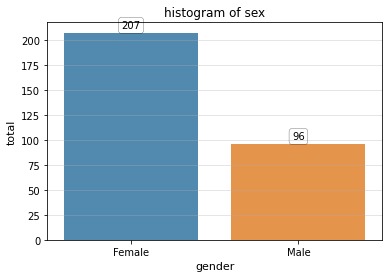

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

In [64]:
labels = ['Female','Male']
order=df['sex']. value_counts().index
ax = sns.countplot(x = 'sex',data = df, order = order, alpha = 0.85)
plt.title('histogram of sex')

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none',linewidth=0.25, boxstyle='round'))
plt.xlabel('gender',fontsize=11, fontfamily='sans-serif')
plt.ylabel('total',fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
plt.show()
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

In [ ]:
#The distribution of female patients are highest compared to male patients .

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (4).

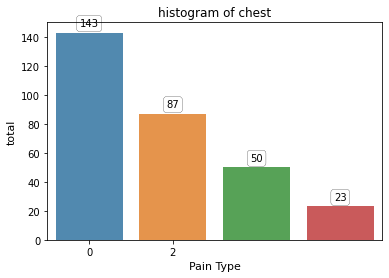

In [63]:

labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index
ax = sns.countplot(x = 'cp',data = df, order = order, alpha = 0.85)
plt.title('histogram of chest')

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none',linewidth=0.25, boxstyle='round'))
plt.xlabel('Pain Type',fontsize=11, fontfamily='sans-serif')
plt.ylabel('total',fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
plt.show()
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

In [ ]:
#Chest pain type 0 have the highest number compared to other types of chest pain.

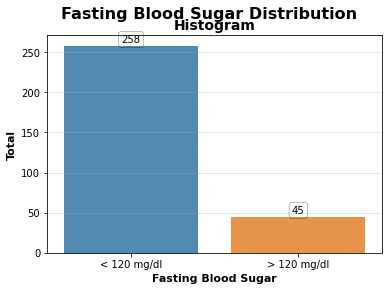

In [71]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))
plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
plt.show()

In [ ]:
#It can be seen that the number of patients with fasting blood sugar less than 120 mg/dl have the highest numbers.

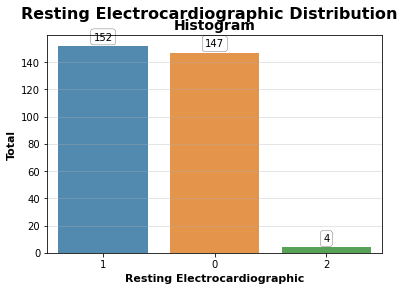

In [73]:
labels=['1', '0', '2']
order=df['restecg'].value_counts().index
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=df,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
    plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

In [ ]:
# Resting electrocardiographic with results 1 and 0 has a higher distribution than result 2.
#In addition, result 1 has the highest distribution compared to the other results.

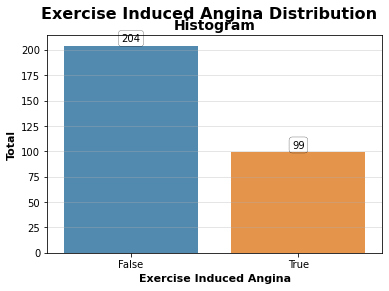

In [74]:
labels=['False', 'True']
order=df['exang'].value_counts().index
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))
plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

In [ ]:
#Patients with no exercise induced angina are the highest compared to patients with exercise induced angina.

In [ ]:
#slope (Slope of the Peak Exercise)

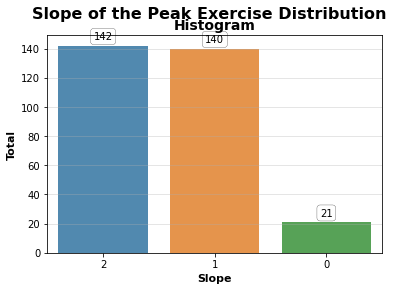

In [78]:
labels=['2', '1', '0']
order=df['slope'].value_counts().index
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')

plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='slope', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))
plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

In [ ]:
# The distribution of slope 1 and 2 are almost the same.

In [ ]:
# Moreover, slope 2 has the highest distribution compared to others.

In [ ]:
#ca (Number of Major Vessels)

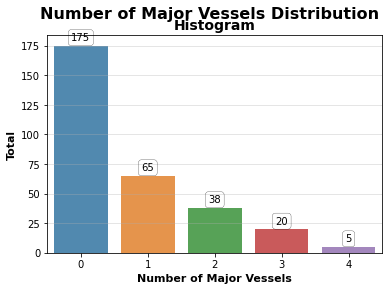

In [79]:
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='ca', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
    plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif',)
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

In [ ]:
#People with 0 major vessel has the highest distribution compared to others.

In [ ]:
# thal

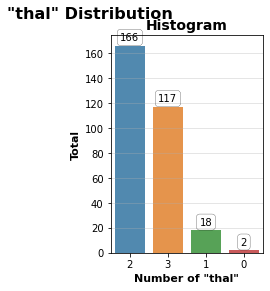

In [80]:
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif')
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='thal', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
    plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)

In [ ]:
#Patients with 2 "thal" has the highest distribution compared to others.

In [162]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.280528,245.134488,0.148515,0.528053,149.692244,0.326733,1.024422,0.729373,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,0.466011,16.582241,47.552910,0.356198,0.525860,22.762004,0.469794,1.110127,1.022606,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,170.000000,369.750000,1.000000,2.000000,202.000000,1.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#target (Heart Diseases Status)

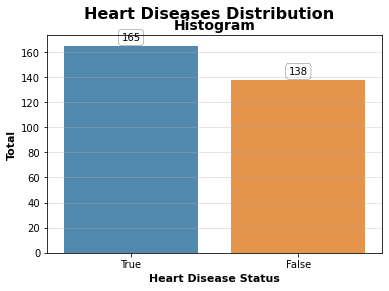

In [81]:
labels=['True', 'False']
order=df['target'].value_counts().index
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='target', data=df,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))
    plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

In [ ]:
#The total number of patients that have heart diseases are higher than patients that have no heart diseases.

In [ ]:
#Descriptive statistics

In [82]:
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [ ]:
#From the descriptive statistics, it can be seen that age, resting blood pressure, cholestoral, and thalach are lack of variation

In [ ]:
#continous columns distribution

In [ ]:
#age(patient age)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

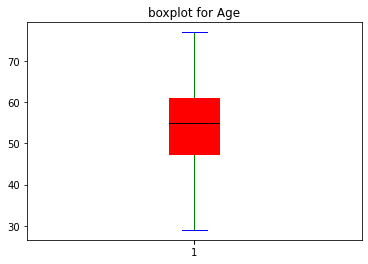

In [96]:
age = df['age']
props2 = dict(boxes = 'red',whiskers = 'green',medians = 'black',caps = 'blue')
age.plot.box(color = props2)
plt.title('boxplot for Age')
df['age'].plot.box(color = props2, patch_artist = True, vert = "True")

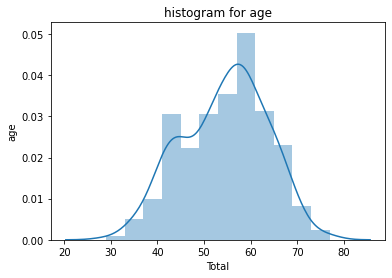

In [104]:
sns.distplot(df.age, kde=True)
plt.xlabel('Total')
plt.ylabel("age")
plt.title("histogram for age")
plt.show()

In [ ]:
# From the histogram and boxplot, it can be seen that this column is normally distributed

In [ ]:
#trestbps (Resting Blood Pressure in mm Hg)

<AxesSubplot:xlabel='trestbps'>

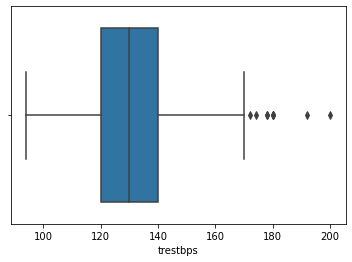

In [106]:
sns.boxplot(df.trestbps)

In [111]:
Q3=df.trestbps.quantile(0.75)
Q1=df.trestbps.quantile(0.25)
print('Q3:',Q3)
print('Q1:',Q1)
IQR=Q3-Q1
print('IQR:',IQR)
HE=Q3+1.5*IQR
LE=Q1-1.5*IQR
print('HE:',HE)
print('LE:',LE)
_HE=len(df[df.trestbps>HE])
_LE=len(df[df.trestbps<LE])
No_of_outliers=_HE+_LE
print('total_no_of_outliers:',No_of_outliers)
total=df.trestbps.value_counts().sum()
print('out_of:',total)

Q3: 140.0
Q1: 120.0
IQR: 20.0
HE: 170.0
LE: 90.0
total_no_of_outliers: 9
out_of: 303


In [112]:
df.loc[df['trestbps']>=HE,'trestbps']=HE
df.loc[df['trestbps']<=LE,'trestbps']=LE

Text(0.5, 1.0, 'boxplot for trestbps')

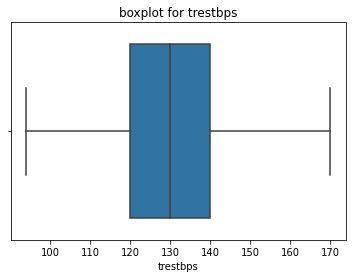

In [163]:
sns.boxplot(df.trestbps)
plt.title("boxplot for trestbps")

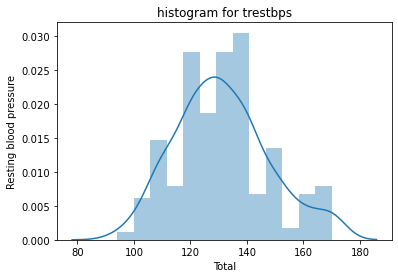

In [164]:
sns.distplot(df.trestbps, kde=True)
plt.xlabel('Total')
plt.ylabel("Resting blood pressure")
plt.title("histogram for trestbps")
plt.show()

<AxesSubplot:xlabel='chol'>

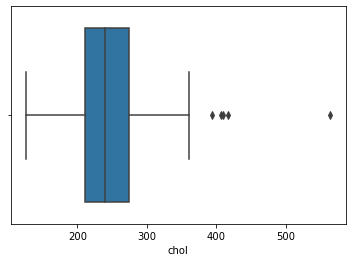

In [115]:
sns.boxplot(df.chol)

In [117]:
Q3=df.chol.quantile(0.75)
Q1=df.chol.quantile(0.25)
print('Q3:',Q3)
print('Q1:',Q1)
IQR=Q3-Q1
print('IQR:',IQR)
HE=Q3+1.5*IQR
LE=Q1-1.5*IQR
print('HE:',HE)
print('LE:',LE)
_HE=len(df[df.chol>HE])
_LE=len(df[df.chol<LE])
No_of_outliers=_HE+_LE
print('total_no_of_outliers:',No_of_outliers)
total=df.chol.value_counts().sum()
print('out_of:',total)

Q3: 274.5
Q1: 211.0
IQR: 63.5
HE: 369.75
LE: 115.75
total_no_of_outliers: 5
out_of: 303


In [118]:
df.loc[df['chol']>=HE,'chol']=HE
df.loc[df['chol']<=LE,'chol']=LE

Text(0.5, 1.0, 'boxplot for chol')

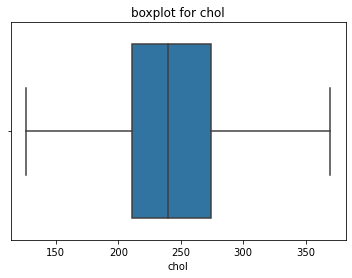

In [165]:
sns.boxplot(df.chol)
plt.title("boxplot for chol")

Text(0.5, 1.0, 'histogram for chol')

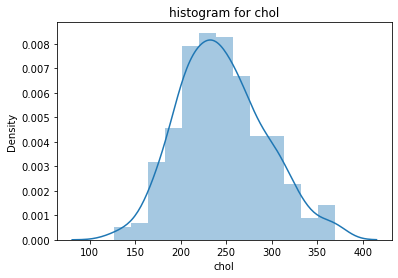

In [166]:
sns.distplot(df.chol)
plt.title("histogram for chol")

<AxesSubplot:xlabel='thalach'>

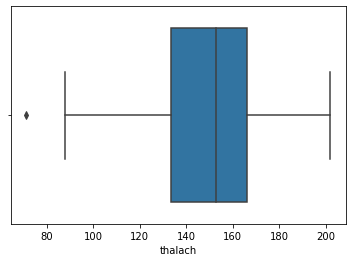

In [122]:
sns.boxplot(df.thalach)

In [123]:
Q3=df.thalach.quantile(0.75)
Q1=df.thalach.quantile(0.25)
print('Q3:',Q3)
print('Q1:',Q1)
IQR=Q3-Q1
print('IQR:',IQR)
HE=Q3+1.5*IQR
LE=Q1-1.5*IQR
print('HE:',HE)
print('LE:',LE)
_HE=len(df[df.thalach>HE])
_LE=len(df[df.thalach<LE])
No_of_outliers=_HE+_LE
print('total_no_of_outliers:',No_of_outliers)
total=df.thalach.value_counts().sum()
print('out_of:',total)

Q3: 166.0
Q1: 133.5
IQR: 32.5
HE: 214.75
LE: 84.75
total_no_of_outliers: 1
out_of: 303


In [124]:
df.loc[df['thalach']>=HE,'thalach']=HE
df.loc[df['thalach']<=LE,'thalach']=LE

Text(0.5, 1.0, 'boxplot for thalach')

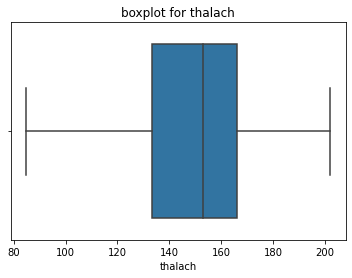

In [169]:
sns.boxplot(df.thalach)
plt.title("boxplot for thalach")

Text(0.5, 1.0, 'histogram for thalach')

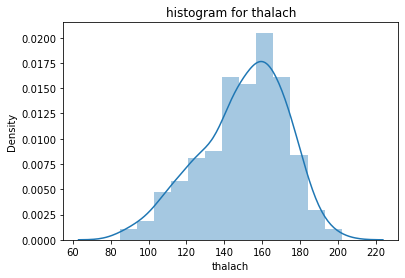

In [170]:
sns.distplot(df.thalach)
plt.title("histogram for thalach")

<AxesSubplot:xlabel='oldpeak'>

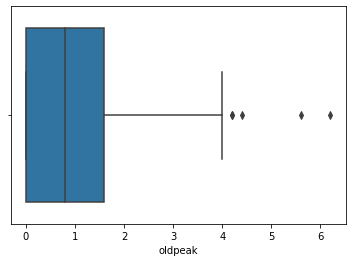

In [128]:
sns.boxplot(df.oldpeak)

In [5]:
Q3=df.oldpeak.quantile(0.75)
Q1=df.oldpeak.quantile(0.25)
print('Q3:',Q3)
print('Q1:',Q1)
IQR=Q3-Q1
print('IQR:',IQR)
HE=Q3+1.5*IQR
LE=Q1-1.5*IQR
print('HE:',HE)
print('LE:',LE)
_HE=len(df[df.oldpeak>HE])
_LE=len(df[df.oldpeak<LE])
No_of_outliers=_HE+_LE
print('total_no_of_outliers:',No_of_outliers)
total=df.oldpeak.value_counts().sum()
print('out_of:',total)

Q3: 1.6
Q1: 0.0
IQR: 1.6
HE: 4.0
LE: -2.4000000000000004
total_no_of_outliers: 5
out_of: 303


In [6]:
df.loc[df['oldpeak']>=HE,'oldpeak']=HE
df.loc[df['oldpeak']<=LE,'oldpeak']=LE

Text(0.5, 1.0, 'boxplot for oldpeak')

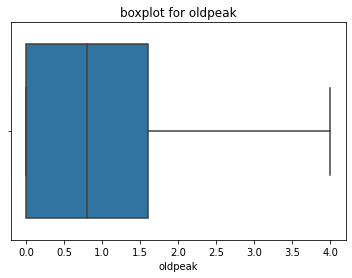

In [7]:
sns.boxplot(df.oldpeak)
plt.title("boxplot for oldpeak")

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

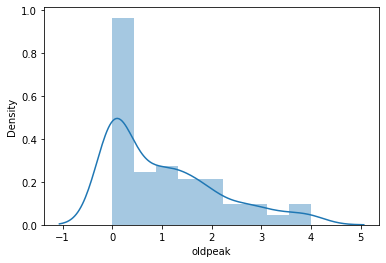

In [132]:
sns.distplot(df.oldpeak)

In [ ]:
#Heart Disease Distribution based on Gender

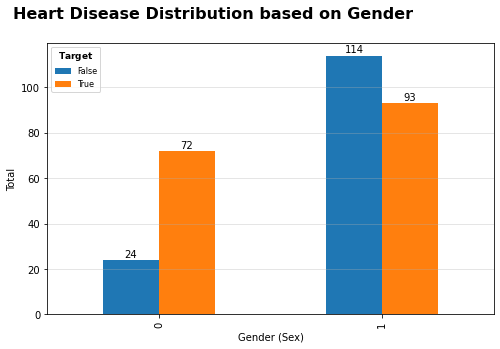

In [140]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

ax = pd.crosstab(df.sex, df.target).plot(kind = 'bar', figsize = (8,5))
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.xlabel('Gender (Sex)')
plt.ylabel('Total')
plt.grid(axis='y', alpha=0.4)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

In [ ]:
#Heart Disease Distribution based on Major Vessels Total 

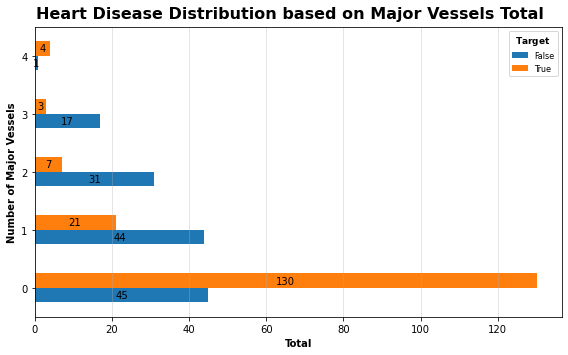

In [141]:
labels = ['False', 'True']
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5))
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')
plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

In [ ]:
# Heart Disease Scatter Plot based on Age 

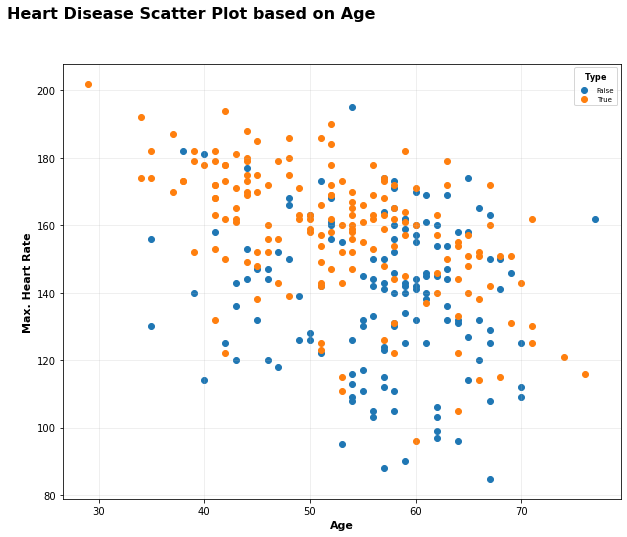

In [144]:
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show()

In [ ]:
#Chest Pain Type based on Age 

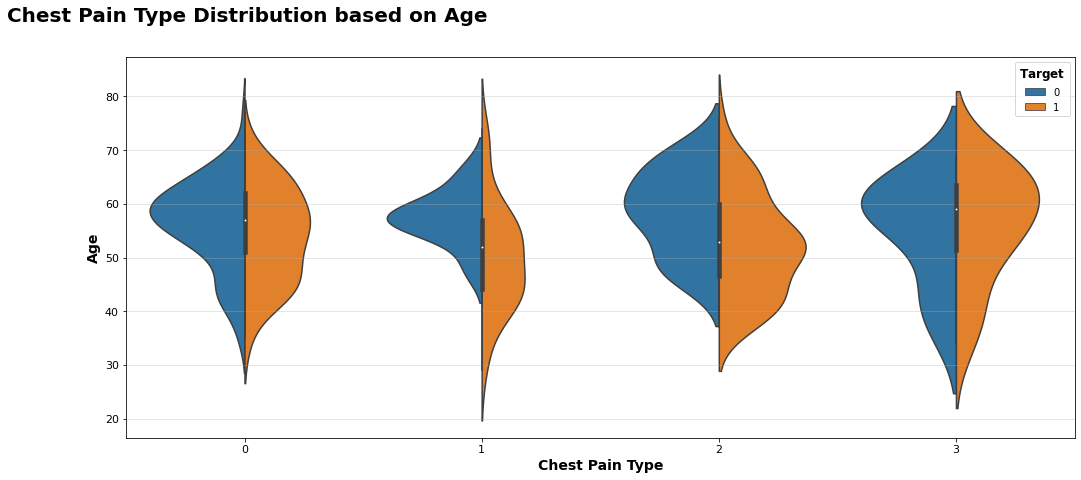

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif')
sns.violinplot(x='cp', y='age', hue='target', data=df, ax=ax, 
 boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif')
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show()

In [ ]:
# Heart Disease Distribution based on Fasting Blood Sugar

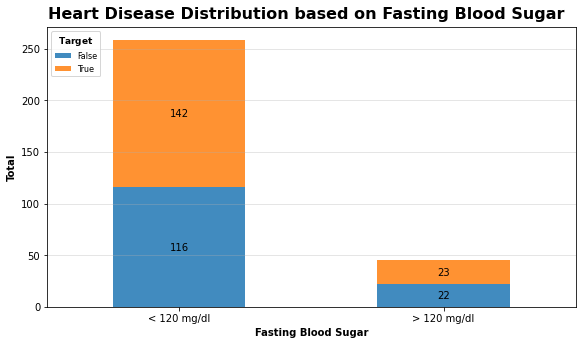

In [147]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5), 
                                         stacked=True,
                                         alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')
    plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
    plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);


In [ ]:
# Heatmap

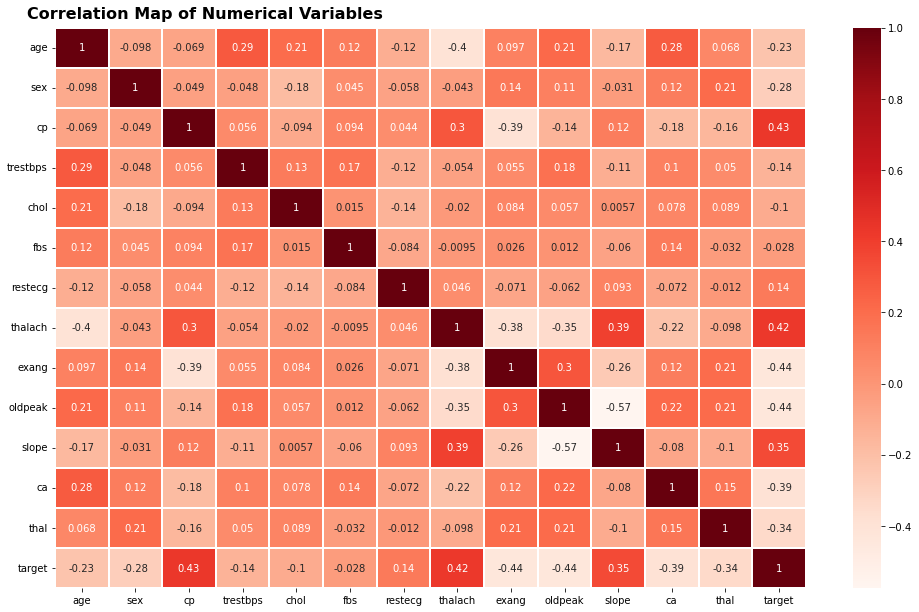

In [148]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [ ]:
# Dataset Pre-processing 

In [ ]:
#This section will prepare the dataset before building the machine learning models.

In [ ]:
# 1. One-Hot Encoding

In [ ]:
#The data pre-processing will be transforming categorical variables using one-hot encoding technique.

In [149]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [150]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,3,145,233.000000,1,0,150.000000,0,2.300000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
37,1,2,130,250.000000,0,1,187.000000,0,3.500000,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
41,0,1,130,204.000000,0,0,172.000000,0,1.400000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
56,1,1,120,236.000000,0,1,178.000000,0,0.800000,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
57,0,0,120,354.000000,0,1,163.000000,1,0.600000,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
#After creating dummy variables, there are some unnecessary variables in the dataframe. These variables will be dropped in the next part.

In [ ]:
#Dropping Unnecessary Variables

In [ ]:
# The variables that unnecessary will be deleted.

In [151]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [152]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
63,1,145,233.000000,1,0,150.000000,0,2.300000,0,1,0,0,0,1,0,1,0,0,1,0,0
37,1,130,250.000000,0,1,187.000000,0,3.500000,0,1,0,0,1,0,0,0,1,0,1,0,0
41,0,130,204.000000,0,0,172.000000,0,1.400000,0,1,0,1,0,0,0,0,1,0,0,0,1
56,1,120,236.000000,0,1,178.000000,0,0.800000,0,1,0,1,0,0,0,0,1,0,0,0,1
57,0,120,354.000000,0,1,163.000000,1,0.600000,0,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
#features separating

In [ ]:
#In this section, the 'target' (dependent) column will be seperated from independent columns.

In [12]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
# In this section, data normalization will be performed to normalize the range of independent variables or features of data.
# Data normalization will use min-max normalization.

In [13]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [ ]:
#Splitting the Dataset

In [ ]:
#The dataset will be splitted into 80:20 ratio (80% training and 20% testing).

In [14]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
# Model Implementation

In [ ]:
#Logistic Regression

In [15]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [29]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
#print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
#print('*' * 26)
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
#logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
          #                  title='Logistic Regression Confusion Matrix')
#logmatrix.fit(x_train, y_train)
#logmatrix.score(x_test, y_test)
#logmatrix.finalize()

# --- LR ROC AUC ---
#logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
       #            title='Logistic Regression ROC AUC Plot')
#logrocauc.fit(x_train, y_train)
#logrocauc.score(x_test, y_test)
#@logrocauc.finalize()

# --- LR Learning Curve ---
#loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
#loglc.fit(x_train, y_train)
#loglc.finalize()

# --- LR Precision Recall Curve ---
#logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
               #                 title='Logistic Regression Precision-Recall Curve')
#logcurve.fit(x_train, y_train)
#logcurve.score(x_test, y_test)
#logcurve.finalize()


#plt.tight_layout()

.:. Logistic Regression Accuracy: 90.16% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

